In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


ImportError: cannot import name 'moving_averages'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train4D = X_train.reshape(X_train.shape[0], 28, 28 ,1).astype('float32')
X_test4D = X_test.reshape(X_test.shape[0], 28, 28 ,1).astype('float32')

In [4]:
X_train4D_normalize = X_train4D/ 255
X_test4D_normalize = X_test4D/ 255

In [5]:
y_trainonehot = np_utils.to_categorical(y_train)
y_testonehot = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dense(10, activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [18]:
train_history = model.fit(x=X_train4D_normalize, y=y_trainonehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3749 - acc: 0.8875 - val_loss: 0.1002 - val_acc: 0.9697
Epoch 2/10
 - 2s - loss: 0.0916 - acc: 0.9720 - val_loss: 0.0686 - val_acc: 0.9801
Epoch 3/10
 - 2s - loss: 0.0661 - acc: 0.9794 - val_loss: 0.0532 - val_acc: 0.9844
Epoch 4/10
 - 2s - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0447 - val_acc: 0.9865
Epoch 5/10
 - 2s - loss: 0.0431 - acc: 0.9862 - val_loss: 0.0441 - val_acc: 0.9875
Epoch 6/10
 - 2s - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0429 - val_acc: 0.9884
Epoch 7/10
 - 2s - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0367 - val_acc: 0.9903
Epoch 8/10
 - 2s - loss: 0.0273 - acc: 0.9913 - val_loss: 0.0348 - val_acc: 0.9900
Epoch 9/10
 - 2s - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0327 - val_acc: 0.9905
Epoch 10/10
 - 2s - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0302 - val_acc: 0.9921


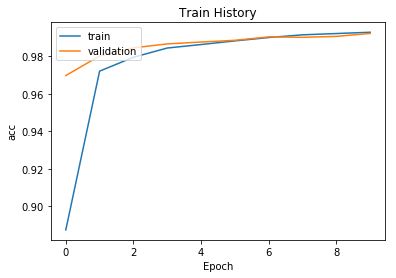

In [19]:
from def_function import show_train_history
show_train_history(train_history, 'acc', 'val_acc')

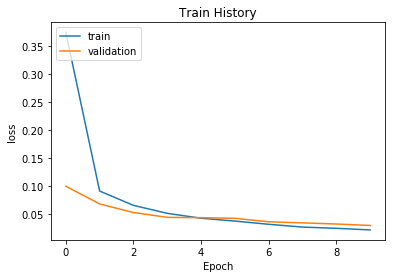

In [20]:
show_train_history(train_history, 'loss', 'val_loss')

In [21]:
scores = model.evaluate(X_test4D_normalize, y_testonehot)
scores[1]

10000/10000 [==============================] - 1s 117us/step


0.9928

In [22]:
prediction = model.predict_classes(X_test4D_normalize)

In [23]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

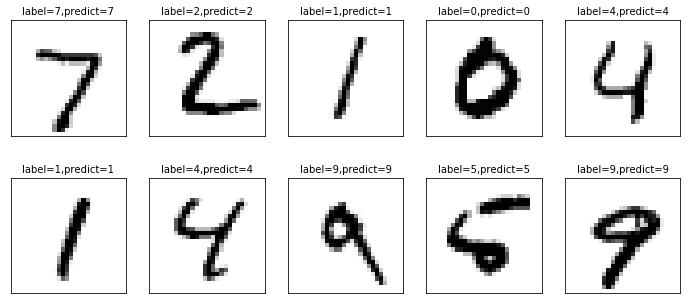

In [24]:
from def_function import plot_images_labels_prediction
plot_images_labels_prediction(X_test, y_test, prediction, idx=0)

In [25]:
import pandas as pd
pd.crosstab(y_test,prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,1,0,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,0,1,1028,0,0,0,0,3,0,0
3,0,0,1,1006,0,1,0,1,1,0
4,0,0,0,0,979,0,0,0,1,2
5,1,0,0,6,0,883,1,0,0,1
6,4,2,0,1,1,1,948,0,1,0
7,0,2,7,1,0,0,0,1014,1,3
8,2,0,2,2,0,1,0,1,962,4
